In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [3]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
#creating a datat structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [5]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [6]:
#Importing the Keras libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
#Initialising the RNN
regressor = Sequential()

In [8]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))

In [9]:
regressor.add(Dropout(0.2))

In [10]:
#Adding the second LSTM Layer and some Drouput regularization
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
#Adding the third LSTM layer and some Droupout regularization
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

In [12]:
#Adding the fourth LSTM layer and some Droupout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
#Adding the output Layer for the model
regressor.add(Dense(units=1))

In [14]:
#Compiling the Regressor
regressor.compile(optimizer = 'adam',loss='mean_squared_error')

In [15]:
# Fitting the Regressor with the training set
regressor.fit(X_train, y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 66ms/step - loss: 0.0457
Epoch 2/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

38/38 [==============================] - 3s 69ms/step - loss: 0.0013


In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [17]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [18]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [19]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

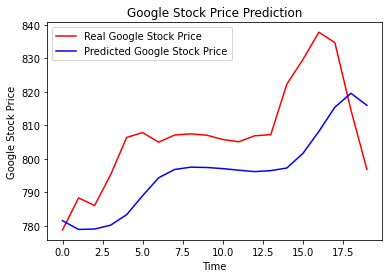

In [20]:
plt.plot(real_stock_price,color='red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()